# Module 6:  Deep Learning
****

Keras is a high-level neural network API written in Python that makes it easy to build and train deep learning models. It supports a wide range of neural network architectures, including CNNs, which are particularly useful for computer vision tasks such as image classification, object detection, and segmentation.

CNNs are a type of neural network that is specifically designed to process image data. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which work together to extract and classify features from images.

Convolutional layers use a set of learnable filters to convolve over the input image, resulting in a set of feature maps that capture different aspects of the image. Pooling layers are used to downsample the feature maps and reduce the dimensionality of the data, while fully connected layers are used to perform the final classification.

To train a CNN, we need a large dataset of labeled images. We can use this data to optimize the weights of the network using techniques such as stochastic gradient descent and backpropagation. Once trained, the CNN can be used to classify new images with high accuracy.

Keras provides a simple and intuitive interface for building and training CNNs. It comes with a wide range of pre-trained models and datasets that can be used for various computer vision tasks, and it also allows for customization and fine-tuning of these models to suit specific needs.

In the following lessons, we will dive deeper into the world of Keras and CNNs, exploring different architectures, techniques, and applications for computer vision. By the end of this course, you will have a solid understanding of how to use Keras to build powerful deep learning models for image classification and other computer vision tasks.

IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.
This enables us to focus on model building, training, and evaluation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import imdb
from keras.datasets import mnist

In [7]:
# Basic Neural Network.  It has 11 input nodes and 1 output node.

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

In [ ]:
model.build()
model.summary()

In [ ]:
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))

### MNist dataset: 
A set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the Hello World of Neural Networks.

In [166]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [167]:
train_data.shape

(60000, 28, 28)

In [168]:
train_data.dtype

dtype('uint8')

In [ ]:
train_data[0]

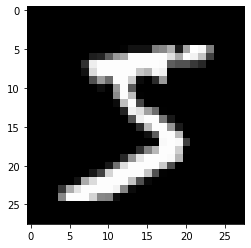

In [170]:
plt.imshow(train_data[0], cmap='gray')

In [171]:
train_labels[0]

5

In [172]:
#Convert Data in 2D array.  1st dimension is the number of images, 2nd dimension is the number of pixels in each image.
# Normalize image data to be between 0 and 1.
train_images = train_data.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_data.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [173]:
train_images.shape

(60000, 784)

In [174]:
train_images.dtype

dtype('float32')

In [ ]:
train_images[0]

In [181]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.build((None, 28 * 28))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 512)               401920    
                                                                 
 dense_53 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [182]:
model.compile(optimizer='rmsprop',
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

In [184]:
results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0696 - accuracy: 0.9791


In [193]:
# Predict the class of the first image in the test set.
model.predict(test_images)[0]

array([7.5444611e-09, 4.9639398e-10, 6.8796629e-07, 5.0879051e-05,
       3.3655877e-13, 1.7893797e-07, 3.2480050e-15, 9.9994802e-01,
       2.8783942e-09, 1.2779927e-07], dtype=float32)

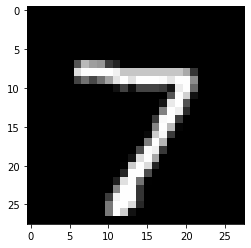

In [194]:
plt.imshow(test_data[0], cmap='gray')

## IMDB Reviews Dataset

In [ ]:
# Load the data
(train_data, train_labels), (test_data, test_labels) 
= imdb.load_data(num_words=10000)

In [ ]:
# The variables train_data and test_data are lists of reviews; each review is a list of
# word indices (encoding a sequence of words). 
train_data[2]

In [ ]:
# train_labels and test_labels are lists of 0s and 1s, 
# where 0 stands for negative and 1 stands for positive
train_labels[0]

1

In [ ]:
# We’re restricting ourselves to the top 10,000 most frequent words, no word
# index will exceed 10,000.

max([max(sequence) for sequence in train_data])

9999

## Convert the review back into words.

In [ ]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index
 # Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
 #Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,”
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]]) 

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Preparing the data
You can’t directly feed lists of integers into a neural network. They all have different
lengths, but a neural network expects to process contiguous batches of data. You have
to turn your lists into tensors. There are two ways to do that:

- Pad your lists so that they all have the same length, turn them into an integer
tensor of shape (samples, max_length), and start your model with a layer capable
of handling such integer tensors (the Embedding layer, which we’ll cover in
detail later in the book).

- Multi-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 8 and 5, which would be 1s. Then you
could use a Dense layer, capable of handling floating-point vector data, as the
first layer in your model.
Let’s go with the latter solution to vectorize the data, which you’ll do manually for
maximum clarity.

In [ ]:
# Multi-hot encoding

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1. 
    return results
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Vectorize the labels

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])

model.build((None, 10000))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                160016    
                                                                 
 dense_33 (Dense)            (None, 16)                272       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model. RMSprop optimizer and binary_crossentropy loss function.
model.compile(optimizer="rmsprop", 
loss="binary_crossentropy",
 metrics=["accuracy"])

# Train the model with the training data and labels.  Train on the full training set for 4 times (epochs). 
# Update the weights after each batch of 512 samples. Add history to keep track of the training process.
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
print("Evaluate on test data")

# Evaluate the model on the test data.
results = model.evaluate(x_test, y_test)

In [ ]:
# Make predictions on the test data on the first data point.
model.predict(x_test[:1])

array([[0.18801302]], dtype=float32)

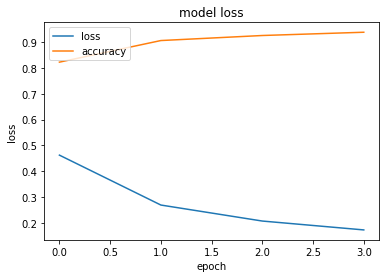

In [ ]:
# Plot the training loss and accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss", "accuracy"], loc="upper left")
plt.show()

Here’s what you should take away from this example:
- You usually need to do quite a bit of preprocessing on your raw data in order to
be able to feed it—as tensors—into a neural network. Sequences of words can
be encoded as binary vectors, but there are other encoding options too.
- Stacks of Dense layers with relu activations can solve a wide range of problems
(including sentiment classification), and you’ll likely use them frequently.
- In a binary classification problem (two output classes), your model should end
with a Dense layer with one unit and a sigmoid activation: the output of your
model should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output on a binary classification problem, the loss
function you should use is binary_crossentropy.
- The rmsprop optimizer is generally a good enough choice, whatever your problem.
That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting
and end up obtaining increasingly worse results on data they’ve never
seen before. Be sure to always monitor performance on data that is outside of
the training set.

The first argument being passed to each Dense layer is the number of units in the
layer: the dimensionality of representation space of the layer. You remember from
chapters 2 and 3 that each such Dense layer with a relu activation implements the following
chain of tensor operations:
output = relu(dot(input, W) + b)

## Convolutional Neural Networks

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [13]:
# import and image with keras
img = keras.preprocessing.image.load_img('Graphics/face.png')
image_arr = keras.preprocessing.image.img_to_array(img)

In [ ]:
print(image_arr)

In [20]:
image_arr.dtype

dtype('float32')

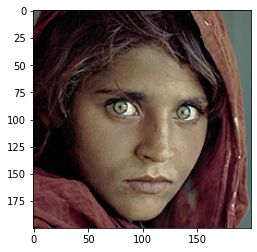

In [21]:
plt.imshow(image_arr.astype(np.uint8))

In [51]:
# Define the 2D kernel
kernel = tf.constant([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=tf.float32)

# Reshape the kernel to a 4D tensor
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

# Load the image
image = keras.preprocessing.image.load_img('Graphics/face.png', grayscale=True)

# Convert the image to a numpy array
image_arr = tf.keras.preprocessing.image.img_to_array(image)

# Add a batch dimension to the image
image_arr = tf.expand_dims(image_arr, axis=0)

# Apply the convolution operation
image_filter = tf.nn.conv2d(
    input=image_arr,
    filters=kernel,
    strides=1,
    padding='SAME'
)

# Remove the batch dimension from the output tensor
image_filtered = tf.squeeze(image_filter)


/opt/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


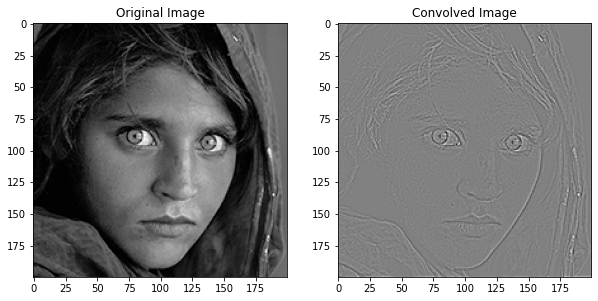

In [50]:
plt.figure(figsize=(10, 10))

# Load the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Load and display the convolved image
plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title('Convolved Image')

plt.show()


Let's walk through an example of how to build a CNN using Keras.  We will use the Minst dataset, which contains 60,000 training images and 10,000 test images of handwritten digits.  The goal is to train a CNN to classify these images into their correct digit categories.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train[0]

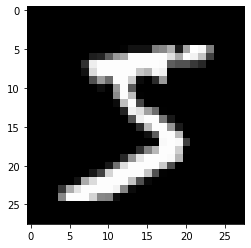

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
print(y_train[0])

5


In [ ]:
#Prepare the data for training

# Convert the data to float32. This is the data type tf.keras layers expect.  Then normalize to between 0 and 1.
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

# Reshape the data to four-dimensional tensor (sample, rows, columns, channels). CNN expect the data to be in this format.
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28,28, 1)

In [ ]:
y_train[0]

5

In [ ]:
#Prepare the labels for training

# How many classes are there?
num_classes = 10


# Convert the labels to binary class matrices. This is called one-hot encoding.  
# This is done because CNN uses categorical cross entropy as its loss function.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

In [ ]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025207605212926865
Test accuracy: 0.9915000200271606
